# Pytorch 기본 경사하강법 구현

Pytorch 를 이용하여 기본적인 Tensor 연산 및 Autograd 에 대한 이해를 하고 기본적인 인공신경망을 구현 하여 이공신경망에 대한 작동을 이해한다.

In [1]:
import torch

# Torch Tensor 기본

In [2]:
#Tensor 지정
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.Size([3, 3])
2


In [3]:
#랭크 늘리기 
x = torch.unsqueeze(x,0)
print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3])
torch.Size([1, 3, 3])
3


In [4]:
#랭크 줄이기 
x = torch.squeeze(x)
print(x)
print(x.size())
print(x.shape)
print(x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
torch.Size([3, 3])
torch.Size([3, 3])
2


In [5]:
#차원 변경
x = x.view(9)
print(x)

# 에러 출력 
try:
    x = x.view(2,4)
except Exception as e:
    print(e)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
shape '[2, 4]' is invalid for input of size 9


# 텐서연산, 행렬곱

In [6]:
w = torch.randn(5,3,dtype=torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print(w.size())
print(x.size())
print(w)
print(x)

torch.Size([5, 3])
torch.Size([3, 2])
tensor([[ 0.5886, -0.4015, -2.5432],
        [-1.6239, -0.8528, -0.3509],
        [ 1.0651,  0.9987, -0.1191],
        [ 0.0520, -0.5338,  1.9251],
        [ 0.3701,  0.1986, -0.9908]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [7]:
b = torch.randn(5,2, dtype=torch.float)
print(b.size())
print(b)

torch.Size([5, 2])
tensor([[ 0.7931, -0.0083],
        [-0.5902, -0.1912],
        [ 0.4466,  0.7312],
        [-0.3215,  0.8272],
        [ 1.5215, -0.6455]])


In [8]:
wx = torch.mm(w,x)
print(wx.size())
print(wx)

torch.Size([5, 2])
tensor([[-13.3318, -15.6879],
        [ -5.9368,  -8.7644],
        [  3.4658,   5.4105],
        [  8.0760,   9.5193],
        [ -3.9883,  -4.4104]])


In [9]:
result = wx+b
print(result.size())
print(result)

torch.Size([5, 2])
tensor([[-12.5387, -15.6961],
        [ -6.5270,  -8.9557],
        [  3.9124,   6.1417],
        [  7.7545,  10.3465],
        [ -2.4668,  -5.0559]])


# Autograd 경사하강법 구현

In [10]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3
l = a**2

In [11]:
l.backward()

In [12]:
print('l을 w 로 미분한 값은 {}'.format(w.grad))

l을 w 로 미분한 값은 18.0


# 오염 이미지 복원 경사하강법 수행

In [13]:
import pickle
import matplotlib.pyplot as plt 

In [14]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding='latin1'))

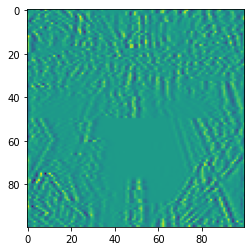

In [15]:
plt.imshow(broken_image.view(100,100))

In [16]:
#이미지 오염 함수 (training 에서 x dataset 으로 활용 예정)
def weird_function(x, n_iter=5):
    h=x 
    filt = torch.tensor([-1./3,1./3,-1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]),0)
        h_r = torch.cat((h[1:],zero_tensor),0)
        h = filt[0]*h+filt[2]*h_l+filt[1]*h_r
        if i %2==0:
            h=torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    
    return h

def distance_loss(hypothesis, broken_image): 
    return torch.dist(hypothesis, broken_image)

In [17]:
# 경사하강법을 적용하기 위한 random tensor 구성
random_tensor = torch.randn(10000,dtype=torch.float)
lr = 0.8

In [18]:
# 오차함수를 Random tensor 로 미분하기 위해 구성
# 무작위 텐서를 weird_function 함수에 통과시켜 가정을 구한 뒤에 distance loss 방법의 손실로 두값을 비교하여 미분하여 경사하강법을 적용함

for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    #직접 경사하강법을 구현하였기 떄문에 파이토치의 자동기울기 계산을 비활성화 해야함
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    
    if i % 1000==0:
        print('loss at {}={}'.format(i,loss.item()))

loss at 0=12.354387283325195
loss at 1000=1.1473524570465088
loss at 2000=0.5493931770324707
loss at 3000=0.38010910153388977
loss at 4000=0.2997358441352844
loss at 5000=0.2501634657382965
loss at 6000=0.2147766798734665
loss at 7000=0.18695521354675293
loss at 8000=0.16356097161769867
loss at 9000=0.14294975996017456
loss at 10000=0.12419199198484421
loss at 11000=0.10672600567340851
loss at 12000=0.09019152075052261
loss at 13000=0.0743488147854805
loss at 14000=0.05903168395161629
loss at 15000=0.04412391036748886
loss at 16000=0.029544709250330925
loss at 17000=0.021153179928660393
loss at 18000=0.02116590552031994
loss at 19000=0.021167635917663574


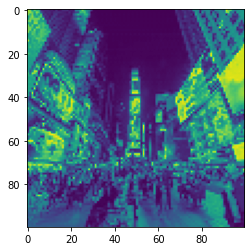

In [19]:
plt.imshow(random_tensor.view(100,100).data)